In [1]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# google sheet: https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0    

#Note: Data has been filtered/changed a bit from orginal form to demonstrate null and outlier handling.


sheet_url = 'https://docs.google.com/spreadsheets/d/14L32EfCmr2asv85i08fla6jf1KakJVcLYaJMkXQ4_p0/edit#gid=0'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)

In [4]:
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3


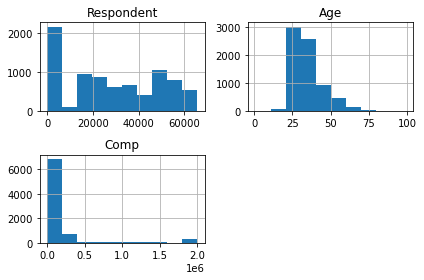

In [5]:
df.hist()
plt.tight_layout();

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     3087 non-null   object 
 6   Gender        7575 non-null   object 
 7   YearsCode     8132 non-null   object 
 8   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 573.3+ KB




### How to handle nulls and outliers

### How do I handle missing data (nulls) in my dataset?

- Drop the nulls
    - drop columns
    - drop rows
- Impute missing values
    - fillna with mean, median, mode of the column
    - Impute using some other algorithms - KNN imputer
- Use algorithms which can handle nulls (i.e., xgboost)

    - Ignores missing values
- Boolean flags for missing data 
    - Missing data may tell meaningful story
    - (https://scikit-learn.org/stable/modules/generated/sklearn.impute.MissingIndicator.html#sklearn.impute.MissingIndicator)


In [9]:
df.shape

(8152, 9)

In [7]:
# How many nulls have in each column?

df.isnull().sum()

Respondent         0
Hobbyist           0
Age              923
Age1stCode        16
Comp               0
Ethnicity       5065
Gender           577
YearsCode         20
YearsCodePro      16
dtype: int64

In [10]:
# % values missing in each column

df.isnull().sum()/len(df)*100

Respondent      0.00
Hobbyist        0.00
Age            11.32
Age1stCode      0.20
Comp            0.00
Ethnicity      62.13
Gender          7.08
YearsCode       0.25
YearsCodePro    0.20
dtype: float64

In [11]:
# Percent complete rach row

complete = 100 - (df.isnull().sum()/len(df)*100)
complete

Respondent     100.00
Hobbyist       100.00
Age             88.68
Age1stCode      99.80
Comp           100.00
Ethnicity       37.87
Gender          92.92
YearsCode       99.75
YearsCodePro    99.80
dtype: float64

In [12]:
# How many nulls have in each row?

df.isnull().sum(axis =1).value_counts()

1    4444
0    2872
3     486
2     344
4       4
5       1
6       1
dtype: int64

In [13]:
# Drop columns using dropna() based on a threshold

# threshold: Require that many non-NA values to survive. 

df.dropna(axis = 1, thresh = 0.5 * len(df.index))

,Respondent,Hobbyist,Age,Age1stCode,Comp,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,Man,17,13
1,14,Yes,27.00,13,66000,Man,5,1
2,17,Yes,25.00,14,79000,Man,7,3
3,18,Yes,32.00,12,1260000,Man,19,12
4,19,No,24.00,15,83400,Man,9,3
...,...,...,...,...,...,...,...,...
8147,65589,Yes,NaN,16,150000,NaN,10,6
8148,65596,Yes,NaN,22,70000,NaN,6,4
8149,65602,Yes,NaN,13,140000,NaN,15,12
8150,65604,No,NaN,13,150000,NaN,7,4


In [1]:
df.shape

NameError: name 'df' is not defined

In [14]:
# Drop rows using dropna() based on a threshold

# threshold: only drop when # of nulls in a row is above the threshold value

df.dropna(axis = 0, thresh = 0.5 * len(df.columns))

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3
...,...,...,...,...,...,...,...,...,...
8147,65589,Yes,NaN,16,150000,NaN,NaN,10,6
8148,65596,Yes,NaN,22,70000,NaN,NaN,6,4
8149,65602,Yes,NaN,13,140000,NaN,NaN,15,12
8150,65604,No,NaN,13,150000,NaN,NaN,7,4


In [15]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [ ]:
# use the function on our dataset
df = handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5)
df.head()

In [16]:
df.head()

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
3,18,Yes,32.00,12,1260000,White or of European descent,Man,19,12
4,19,No,24.00,15,83400,White or of European descent,Man,9,3


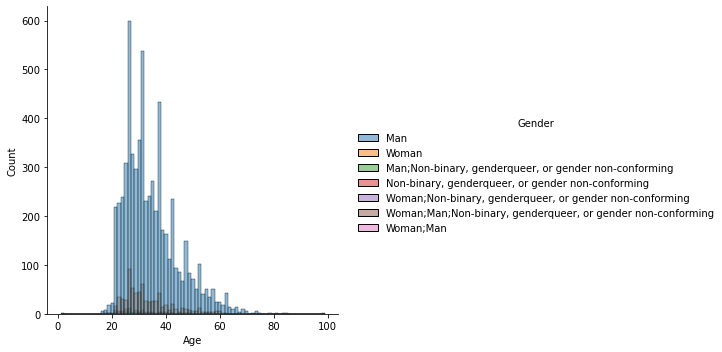

In [26]:
sns.displot(data=df, x='Age', hue='Gender')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8152 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8152 non-null   int64  
 1   Hobbyist      8152 non-null   object 
 2   Age           7229 non-null   float64
 3   Age1stCode    8136 non-null   object 
 4   Comp          8152 non-null   int64  
 5   Ethnicity     3087 non-null   object 
 6   Gender        7575 non-null   object 
 7   YearsCode     8132 non-null   object 
 8   YearsCodePro  8136 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 573.3+ KB


In [28]:
# check nulls again
df.isnull().sum()

Respondent         0
Hobbyist           0
Age              923
Age1stCode        16
Comp               0
Ethnicity       5065
Gender           577
YearsCode         20
YearsCodePro      16
dtype: int64

In [29]:
# drop null rows for specific columns only

df = df[df.YearsCode.notnull()]
df = df[df.YearsCodePro.notnull()]
df = df[df.Age1stCode.notnull()]

df.isnull().sum()

Respondent         0
Hobbyist           0
Age              914
Age1stCode         0
Comp               0
Ethnicity       5039
Gender           574
YearsCode          0
YearsCodePro       0
dtype: int64

In [30]:
# what is the most common/frequent observation in Gender in train dataset?
df.Gender.value_counts()/len(df)*100

Man                                                           81.77
Woman                                                          9.20
Non-binary, genderqueer, or gender non-conforming              1.18
Man;Non-binary, genderqueer, or gender non-conforming          0.37
Woman;Non-binary, genderqueer, or gender non-conforming        0.33
Woman;Man                                                      0.04
Woman;Man;Non-binary, genderqueer, or gender non-conforming    0.02
Name: Gender, dtype: float64

In [31]:
# Fill NaNs with mode

df.Gender.mode()[0]

df['Gender'] = df.Gender.fillna(df.Gender.mode()[0])

In [32]:
# check nulls again
df.isnull().sum()

Respondent         0
Hobbyist           0
Age              914
Age1stCode         0
Comp               0
Ethnicity       5039
Gender             0
YearsCode          0
YearsCodePro       0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   object 
 4   Comp          8108 non-null   int64  
 5   Ethnicity     3069 non-null   object 
 6   Gender        8108 non-null   object 
 7   YearsCode     8108 non-null   object 
 8   YearsCodePro  8108 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 633.4+ KB


In [34]:
# can I simply convert the object columns to float/int using 'astype'?
df['Age1stCode'] = df.Age1stCode.astype('int64')

ValueError: invalid literal for int() with base 10: 'Younger than 5 years'

In [37]:
# We have some strings these columns preventing them to be converted to int dtypes
df.YearsCode.value_counts()


10                    632
20                    485
6                     424
8                     420
7                     410
5                     390
15                    381
12                    353
25                    299
9                     278
4                     256
11                    232
14                    230
16                    219
13                    219
30                    213
3                     211
18                    195
17                    186
22                    168
40                    160
35                    137
23                    136
21                    125
2                     122
19                    118
24                    111
26                     95
38                     85
27                     72
28                     67
37                     65
36                     58
32                     57
34                     55
29                     45
42                     44
1                      42
33          

In [38]:
df.Age1stCode.value_counts()

12                      889
13                      710
15                      689
14                      675
10                      656
16                      650
18                      602
11                      387
17                      383
8                       351
19                      324
9                       235
20                      215
7                       182
21                      142
25                      117
22                      114
6                       105
23                       99
24                       89
26                       75
5                        57
27                       56
Younger than 5 years     55
30                       53
28                       45
29                       32
31                       25
35                       19
33                       18
32                       12
34                        8
36                        6
40                        6
39                        6
38                  

In [39]:
# use replace function to reaplce strings with values

df.replace('Younger than 5 years',4, inplace = True )
df.replace('Older than 85', 85, inplace = True )

df.replace('More than 50 years', 50, inplace = True )

df.replace('Less than 1 year', 0, inplace = True )

In [40]:
# Now we can change datatype for these columns from 'object' to 'int64'

df['Age1stCode'] = df.Age1stCode.astype('int64')
df['YearsCode'] = df.YearsCode.astype('int64')
df['YearsCodePro'] = df.YearsCodePro.astype('int64')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8151
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    8108 non-null   int64  
 1   Hobbyist      8108 non-null   object 
 2   Age           7194 non-null   float64
 3   Age1stCode    8108 non-null   int64  
 4   Comp          8108 non-null   int64  
 5   Ethnicity     3069 non-null   object 
 6   Gender        8108 non-null   object 
 7   YearsCode     8108 non-null   int64  
 8   YearsCodePro  8108 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 633.4+ KB


I will try to impute age using other columns, but I need to split my data first

In [42]:
# split the data in train, validate and test dataframes
train, test = train_test_split(df,test_size=0.2, random_state=42)
train, validate = train_test_split(train,test_size=0.25, random_state=42)

In [43]:
# check the shape of three dataframes
train.shape,validate.shape, test.shape

((4864, 9), (1622, 9), (1622, 9))

In [44]:
# use KNN imputer to find missing values for 'Age' 
from sklearn.impute import KNNImputer

#Use numeric columns that you want to use for imputation
X_numeric = train[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']]

# define the thing
imputer = KNNImputer(n_neighbors=1)

# fit the thing (or fit and use with fit_transform) only on train!
train_imputed = imputer.fit_transform(X_numeric)
train_imputed

array([[41.,  5., 36., 20.],
       [32., 11., 21.,  7.],
       [37.,  7., 30., 18.],
       ...,
       [28., 16., 13.,  8.],
       [25., 14., 11.,  2.],
       [36., 12., 25., 14.]])

In [45]:
# check there is no null in imputed columns
pd.DataFrame(train_imputed).isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [47]:
# convert imputed array to a dataframe
train_imputed = pd.DataFrame(train_imputed, index = train.index)
train_imputed.head()

,0,1,2,3
1766,41.00,5.00,36.00,20.00
14,32.00,11.00,21.00,7.00
6270,37.00,7.00,30.00,18.00
8055,32.00,24.00,7.00,5.00
7801,34.00,8.00,26.00,12.00


In [48]:
# assign imputed values to the age column
train['Age'] = train_imputed[[0]]

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4864 entries, 1766 to 593
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Respondent    4864 non-null   int64  
 1   Hobbyist      4864 non-null   object 
 2   Age           4864 non-null   float64
 3   Age1stCode    4864 non-null   int64  
 4   Comp          4864 non-null   int64  
 5   Ethnicity     1871 non-null   object 
 6   Gender        4864 non-null   object 
 7   YearsCode     4864 non-null   int64  
 8   YearsCodePro  4864 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 380.0+ KB


In [50]:
# do the transformation on validate and test
validate_imputed = imputer.transform(validate[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']])
test_imputed = imputer.transform(test[['Age', 'Age1stCode', 'YearsCode', 'YearsCodePro']])

In [51]:
# convert arrarys from above cell in dataframes
validate_imputed = pd.DataFrame(validate_imputed, index = validate.index)
test_imputed = pd.DataFrame(test_imputed, index = test.index)


In [52]:
# assign imputed to 'Age' column for validate and test dataframes
validate['Age'] = validate_imputed[[0]]
test['Age'] = test_imputed[[0]]

### Outliers
- Data point(s) that differs significantly from other observations
- Could be due to chance, measurement errors, transcription error, sampling error/bias,

Question to ask:
- Is the outlier part of population that I want to explore/model?

Text(0.5, 1.0, 'Compensation')

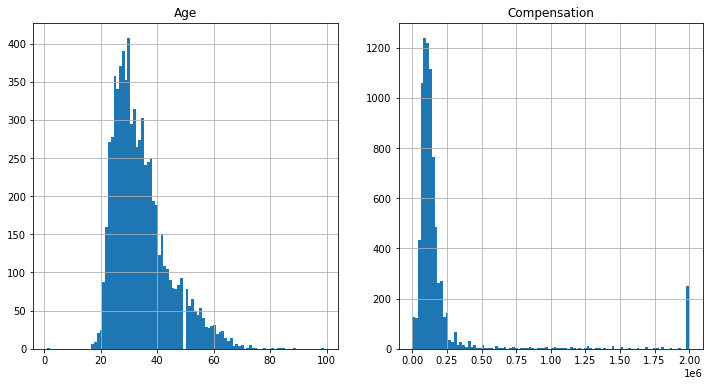

In [53]:
# plot histograms from Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
df.Age.hist(bins = 100)
plt.title('Age')

plt.subplot(122)
df.Comp.hist(bins = 100)
plt.title('Compensation')

<AxesSubplot:title={'center':'Compensation'}, ylabel='Comp'>

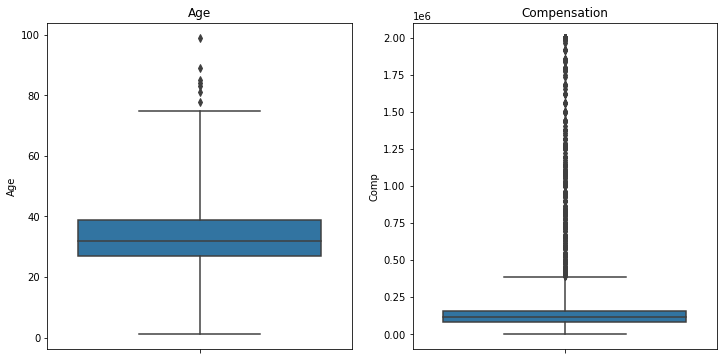

In [54]:
# Boxplot for Age and Compensation

plt.figure(figsize = (12,6))

plt.subplot(121)
sns.boxplot(y = 'Age', data = df, whis = 3)
plt.title('Age')

plt.subplot(122)
plt.title('Compensation')
sns.boxplot(y = 'Comp', data = df, whis = 3)


### Handling Outliers:
- Use domain knowledge/business rules to have cut-offs
- Use IQR method to exclude outliers
- Cap/Trim max value 
- transformation
- Impute new value (if you know outlier is a mistake)

In [55]:
# Calculate q1, q3 and iqr for Age

q1 = df.Age.quantile(0.25)
q3 = df.Age.quantile(0.75)
iqr = q3 - q1
k = 3

# calculate upper and lower ranges
upper_bound_Age =  q3 + k * iqr
lower_bound_Age =  q1 - k * iqr

In [56]:
# Calculate q1, q3 and iqr for Comp


q1 = df.Comp.quantile(0.25)
q3 = df.Comp.quantile(0.75)
iqr = q3 - q1
k = 3

# calculate upper and lower ranges
upper_bound_Comp = q3 + k * iqr
lower_bound_Comp = q1 - k * iqr

In [57]:
# Filter dataframe using multiple conditions

df[(df.Age < upper_bound_Age) & (df.Comp < upper_bound_Comp)]

,Respondent,Hobbyist,Age,Age1stCode,Comp,Ethnicity,Gender,YearsCode,YearsCodePro
0,8,Yes,36.00,12,116000,White or of European descent,Man,17,13
1,14,Yes,27.00,13,66000,White or of European descent,Man,5,1
2,17,Yes,25.00,14,79000,White or of European descent,Man,7,3
4,19,No,24.00,15,83400,White or of European descent,Man,9,3
6,42,No,32.00,14,130000,White or of European descent,Man,16,10
...,...,...,...,...,...,...,...,...,...
8060,62907,Yes,33.00,14,61000,White or of European descent,Man,0,0
8061,62908,Yes,43.00,6,170000,Hispanic or Latino/a/x,Man,5,3
8062,62913,No,33.00,33,55000,White or of European descent,Woman,0,0
8121,64810,Yes,32.00,12,74500,White or of European descent,Man,19,7


In [ ]:
# Cap the limit

# df['column'] = np.where(this_is_true(?), do_this, else_do_that)

df.Comp_capped = np.where(df.Comp > 1_000_000, df.Comp == 1_000_000, df.Comp)